#### 이상치
- 상식적인 범위를 벗어나는 데이터 값
- 통계적 방법 혹은 도메인 지식 활용해서 판단

In [3]:
import pandas as pd

In [4]:
mpg = pd.read_csv('resource/mpg.csv')

In [5]:
import seaborn as sns   # 이상치 제거할 때 가장 많이 사용하는 시각화 그래프 : boxplot

<AxesSubplot:ylabel='hwy'>

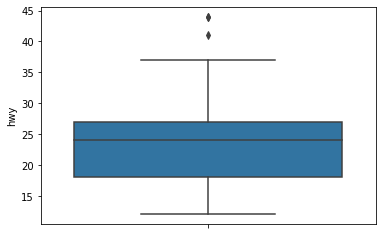

In [6]:
sns.boxplot(data=mpg, y = 'hwy')

- 상자 아래 세로선, 아랫수염, 하위 0~25% 내에 해당하는 값
- 상자 밑면 1사분위수(Q1), 하위 25% 위치 값
- 상자 내 굵은 선 2사분위수(Q2), 하위 50% 위치 값(중앙 값)
- 상자 윗면, 3사분위수(Q3), 하위 75% 위치 값
- 상자 위 세로선, 윗수염, 하위 75 ~ 100% 내에 해당하는 값
- 상자 밖 가로선 극단치 경계(이상치 경계) : Q1, Q3 밖 1.5IQR 내 최댓값
- 상자 밖 점 표식 극단치(이상치) : Q1, Q3 밖 1.5IQR를 벗어난 값

quantile() 함수로 분위수를 구할 수 있다.

In [7]:
qut25  = mpg['hwy'].quantile(.25)

In [8]:
qut75 = mpg['hwy'].quantile(.75)

In [9]:
qut25

18.0

In [10]:
qut75

27.0

#### IQR 구하기

IQR이란, 1사분위수와 3사분위수의 거리 (Inter Quantile range, 사분위 범위)

In [11]:
iqr = qut75 - qut25

In [12]:
iqr

9.0

#### 상한과 하한 구하기

극단치의 경계가 되는 상한과 하한
- 상한 : 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값
- 하한 : 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값

In [13]:
# 상한
qut75 + 1.5*iqr

40.5

In [14]:
# 하한
qut25 - 1.5*iqr

4.5

#### 극단치 결측 처리하기

In [15]:
import numpy as np

In [20]:
mpg['hwy'] = np.where((mpg['hwy']<4.5) | (mpg['hwy']>40.5), np.nan, mpg['hwy'])

In [21]:
mpg['hwy'].isna().sum()  # 이상치가 3개

3

In [22]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy=('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


#### 데이터를 추출하는 법

In [23]:
# 칼럼, 열 기준으로 데이터 추출
mpg['manufacturer']

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [24]:
mpg[['manufacturer','drv']]

,manufacturer,drv
0,audi,f
1,audi,f
2,audi,f
3,audi,f
4,audi,f
...,...,...
229,volkswagen,f
230,volkswagen,f
231,volkswagen,f
232,volkswagen,f


#### 로우, 행 단위로 데이터를 추출하는 경우
- loc : 행 번호를 기준으로 행 데이터 추출
- iloc : 인덱스를 기준으로 행 데이터 추출

In [25]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [26]:
mpg_rows = mpg.shape[0]

In [27]:
mpg_rows_1 = mpg_rows-1
print(mpg_rows_1)

233


In [29]:
mpg.loc[mpg_rows_1] # mpg_rows_1 값의 행 번호를 갖는 행 추출

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [31]:
# 인덱스 값을 이중 리스트 형태로 여러 개 넣을 수도 있다.
mpg.loc[[0,4,233,12,41]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26.0,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25.0,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24.0,r,minivan


#### loc 과 iloc
- loc은 데이터프레임의 행 번호를 사용해 데이터 추출
- iloc은 데이터의 행 순서 인덱스를 사용해 데이터 추출

In [34]:
print(mpg.loc[0])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object


In [35]:
print(mpg.iloc[0])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object


In [36]:
y = range(10)

In [37]:
mpg.iloc[[1,2,3,4,5,6,7]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact


In [38]:
mpg.iloc[y]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact


In [39]:
mpg_new = mpg.loc[[0,2,4,6,8]]

In [40]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact


In [45]:
mpg_new.loc[2].to_frame()

,2
manufacturer,audi
model,a4
displ,2.0
year,2008
cyl,4
trans,manual(m6)
drv,f
cty,20
hwy,31.0
fl,p


In [43]:
mpg_new.iloc[2].to_frame() # iloc은 해당 데이터프레임에서의 인덱스 값으로 행 추출

,4
manufacturer,audi
model,a4
displ,2.8
year,1999
cyl,6
trans,auto(l5)
drv,f
cty,16
hwy,26.0
fl,p


In [47]:
mpg_new.loc[8].to_frame()

,8
manufacturer,audi
model,a4 quattro
displ,1.8
year,1999
cyl,4
trans,auto(l5)
drv,4
cty,16
hwy,25.0
fl,p


#### loc, iloc 자유자재로 다뤄보기

In [48]:
mpg.loc[:, ['model', 'cty']]

,model,cty
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16
...,...,...
229,passat,19
230,passat,21
231,passat,16
232,passat,18


In [49]:
mpg.loc[1:100, ['model','cty']] # loc 추출할 칼럼에 대해서는 변수명을 적어줘야 한다

,model,cty
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
...,...,...
96,mustang,15
97,mustang,15
98,mustang,14
99,civic,28


In [50]:
mpg.iloc[1:10, [1,2,3]] # iloc은 추출할 칼럼에 대해서 칼럼의 인덱스를 적어서 추출할 수 있다

,model,displ,year
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999
5,a4,2.8,1999
6,a4,3.1,2008
7,a4 quattro,1.8,1999
8,a4 quattro,1.8,1999
9,a4 quattro,2.0,2008


In [53]:
small_range = list(range(7))
print(small_range)

[0, 1, 2, 3, 4, 5, 6]


In [55]:
sm_range = list(range(0,10,2))
print(sm_range)

[0, 2, 4, 6, 8]


In [56]:
mpg.iloc[:, sm_range]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29.0
1,audi,1.8,4,f,29.0
2,audi,2.0,4,f,31.0
3,audi,2.0,4,f,30.0
4,audi,2.8,6,f,26.0
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28.0
230,volkswagen,2.0,4,f,29.0
231,volkswagen,2.8,6,f,26.0
232,volkswagen,2.8,6,f,26.0


#### 슬라이싱 복습

In [57]:
mpg.iloc[:,:2]  # 0, 1 칼럼 추출

,manufacturer,model
0,audi,a4
1,audi,a4
2,audi,a4
3,audi,a4
4,audi,a4
...,...,...
229,volkswagen,passat
230,volkswagen,passat
231,volkswagen,passat
232,volkswagen,passat


In [58]:
mpg.iloc[:, 0:8:2]  # 0~7까지의 칼럼에 대해 간격이 2만큼인 0,2,4,6 인덱스를 갖는 칼럼 추출

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
...,...,...,...,...
229,volkswagen,2.0,4,f
230,volkswagen,2.0,4,f
231,volkswagen,2.8,6,f
232,volkswagen,2.8,6,f


In [59]:
mpg.iloc[[1,2,3,4,5], [2,3,4,5]]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)
